# perceptron

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn import datasets


In [273]:
"""
x: 特徴量＋バイアス項(すべてのレコードで一定)
y: 教師データ
x: 重み(特徴量の個数のベクトル)
eta: 学習係数、学習率
"""


In [290]:
bias = 1
eta = 0.1
train_x = np.c_[X, np.repeat(bias, 100)]
train_y = (Y>5).astype(int)
weight = np.zeros(train_x.shape[1])


In [180]:
train_x[:5]

array([[ 1.05445173, -1.07075262,  1.        ],
       [-0.36274117, -0.63432209,  1.        ],
       [-0.85409574,  0.3130677 ,  1.        ],
       [ 1.3263859 ,  0.29823817,  1.        ],
       [-0.4615846 , -1.31590741,  1.        ]])

In [181]:
train_y

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0])

In [182]:
def step(y):
    """活性化関数?"""
    return 1 if y > 0 else 0

In [183]:
def feedforward(i, w):
    """出力関数
    
    特徴量と重みの内積に活性化関数を適用する
    内積はnumpyを頼る
    """
    return step(np.dot(i, w))

In [184]:
def train(w, i, y, eta):
    """すべての特徴量にかける重みを更新
    
    今回は出力が0/1の二値
    損失関数・誤差関数にかけて、誤差があるなら(1-0, 0-1の場合)、
    特徴量に誤差と学習率をかけて重みを調整する
    """
    o = feedforward(i, w)
    for j in range(len(w)):
        w[j] = w[j] + (y - o) * i[j] * eta
    return w


In [185]:
"""学習を繰り返す"""
# 繰り返し回数
epoch = 100
for i in range(epoch):
    for x, y in zip(train_x, train_y):
        weight = train(weight, x, y, eta)

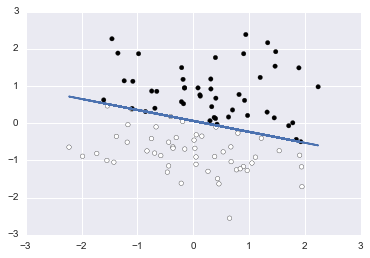

In [311]:
# ax1+bx2+c = 0
# x2 = -(a/b)x1 -(c/b)
x2 = -weight[0]/weight[1] * X[:, 0] -(weight[2]/weight[1]) 
plt.plot(X[:,0], x2)
plt.scatter(X[:, 0], X[:, 1], c=Y>5)


In [286]:
weight

array([ 0.33486568,  1.04012668, -0.1       ])

In [287]:
[
    step(np.dot(np.array([1, -2, 1]), weight)),
    step(np.dot(np.array([-1, 2, 1]), weight)),
    step(np.dot(np.array([1, 0, 1]), weight)),
]


[0, 1, 1]

In [326]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import ipywidgets

%matplotlib inline

def f(X, Y):
    @ipywidgets.interact(
        etas={'0.01': 0.01, '0.1': 0.1, '0.5': 0.5},
        with_bias=True,
        epoch=(1, 100, 1),
        end=(2,100, 2)
    )
    def plot(etas=0.1, with_bias=True, epoch=100, end=100):
        #bias = 1
        #eta = 0.1
        #train_x = np.c_[X, np.repeat(bias, 100)]
        #train_y = Y

        bias = 1 * with_bias
        eta = etas
        train_x = np.c_[X, np.repeat(bias, len(X))][:end]
        train_y = Y[:end]
        weight = np.zeros(train_x.shape[1])

        for i in range(epoch):
            for x, y in zip(train_x, train_y):
                weight = train(weight, x, y, eta)

        # ax1+bx2+c = 0
        # x2 = -(a/b)x1 -(c/b)
        x2 = -weight[0]/weight[1] * train_x[:, 0] -(weight[2]/weight[1]) 
        plt.plot(train_x[:,0], x2)
        plt.scatter(train_x[:, 0], train_x[:, 1], c=train_y)
    return plot

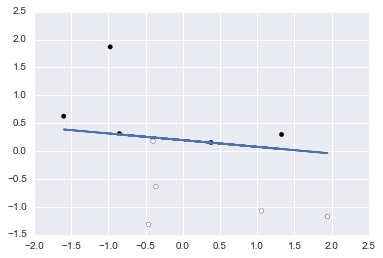

In [327]:
# Generate a random regression problem.
X, Y = datasets.make_regression(
    n_samples=100, n_features=2, n_informative=2, n_targets=1, 
    bias=0.0, effective_rank=None, tail_strength=0.5, noise=1.0, shuffle=True, coef=False, random_state=0)

f(X, Y > 5)()

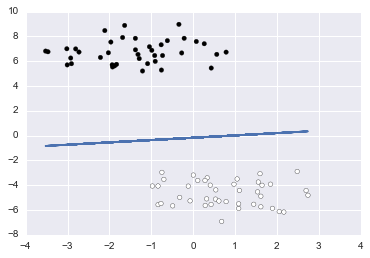

In [332]:
# Generate isotropic Gaussian blobs for clustering.
# datasets.make_blobs([n_samples, n_features, ...])
X_b, Y_b = datasets.make_blobs(
    n_samples=100, n_features=2, centers=2, cluster_std=1.0, 
    center_box=(-10.0, 10.0), shuffle=True, random_state=100)
plt.scatter(X_b[:, 0], X_b[:, 1], c=Y_b, cmap=plt.cm.Paired)

f(X_b, Y_b)()

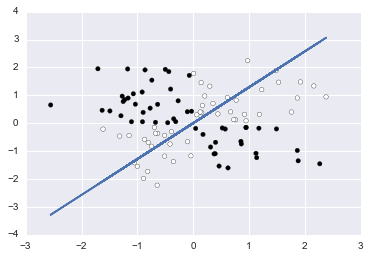

In [329]:
# http://scikit-learn.org/dev/auto_examples/gaussian_process/plot_gpc_xor.html

rng = np.random.RandomState(0)
X_xor = rng.randn(200, 2)
Y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)

f(X_xor, Y_xor)()

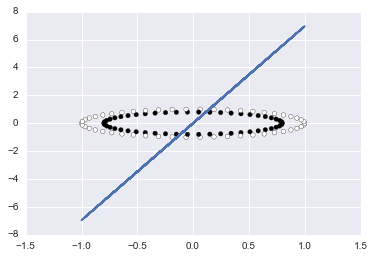

In [330]:
# Make a large circle containing a smaller circle in 2d.
X_circle, Y_circle = datasets.make_circles(n_samples=100, shuffle=True, noise=None, random_state=None, factor=0.8)
plt.scatter(X_circle[:, 0], X_circle[:, 1], c=Y_circle, cmap=plt.cm.Paired)

f(X_circle, Y_circle)()

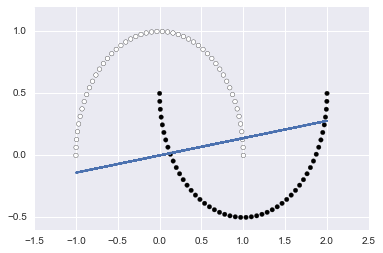

In [331]:
# Make two interleaving half circles
X_moons, Y_moons = datasets.make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=Y_moons, cmap=plt.cm.Paired)

f(X_moons, Y_moons)()

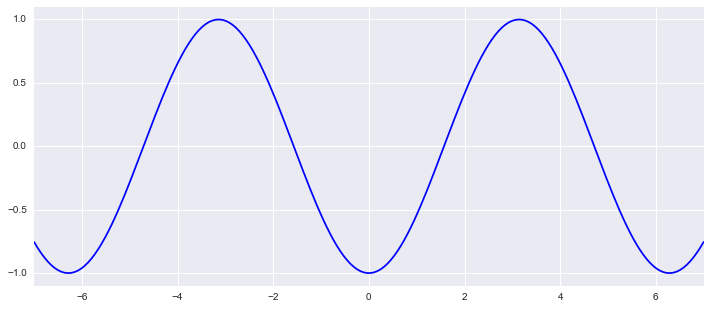

In [270]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation as ani
import seaborn as sns

num_frame = 80.
x_range= 7

def animate(nframe):
    # global num_frame
    plt.clf()
    a = ((5*nframe/num_frame) -.5) * np.pi
    x = np.linspace(-x_range, x_range, 200)
    y = np.sin(x+a)

    plt.xlim(-x_range, x_range)
    plt.ylim(-1.1,1.1)
    plt.plot(x, y, c="b")

fig = plt.figure(figsize=(12,5))
anim = ani.FuncAnimation(fig, animate, frames=int(num_frame))#, blit=True)
anim.save('anim_test.gif', writer='imagemagick', fps=5, dpi=64)

In [23]:
datasets.load_digits?


In [141]:
n_class = 10
digits = datasets.load_digits()
# https://datamicroscopes.github.io/mnist_predictions.html
type(digits)

sklearn.datasets.base.Bunch

In [214]:
digits.target, digits.target.shape

(array([0, 1, 2, ..., 8, 9, 8]), (1797,))

In [217]:
digits.images.shape, digits.images[:3]

((1797, 8, 8), array([[[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
         [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
         [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
         [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
         [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
         [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
         [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
         [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]],
 
        [[  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.],
         [  0.,   0.,   0.,  11.,  16.,   9.,   0.,   0.],
         [  0.,   0.,   3.,  15.,  16.,   6.,   0.,   0.],
         [  0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.],
         [  0.,   0.,   1.,  16.,  16.,   3.,   0.,   0.],
         [  0.,   0.,   1.,  16.,  16.,   6.,   0.,   0.],
         [  0.,   0.,   1.,  16.,  16.,   6.,   0.,   0.],
         [  0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.]],
 
        [[  0.,   0.,   0.,   4.,  1

In [219]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

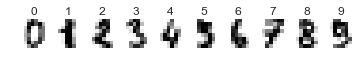

In [269]:
for index, (image, label) in enumerate(zip(digits.images[:10], digits.target[:10])):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

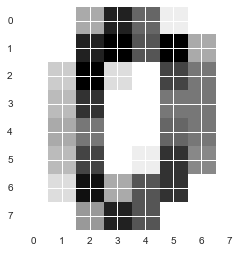

In [239]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

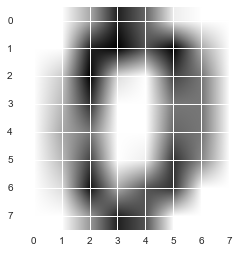

In [240]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)

In [24]:
import PIL

In [222]:
PIL.Image.fromarray?
# http://pillow.readthedocs.io/en/3.2.x/handbook/concepts.html#modes

In [242]:
img = PIL.Image.fromarray(digits.images[0], mode="L")
img

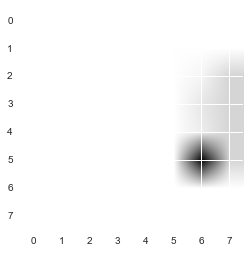

In [227]:
plt.imshow(img)

In [243]:
img.show()

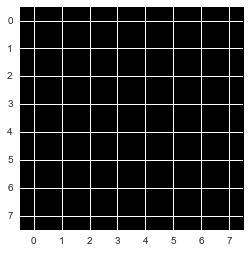

In [265]:
_img = PIL.Image.fromarray(digits.images[0], mode="1")
plt.imshow(_img, cmap=plt.cm.gray_r)

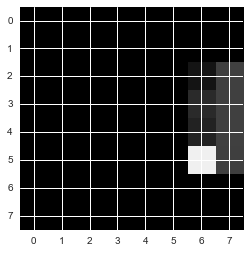

In [236]:
plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')

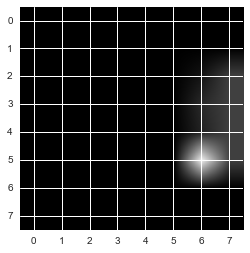

In [238]:
plt.imshow(img, cmap=plt.cm.binary)#, interpolation='nearest')

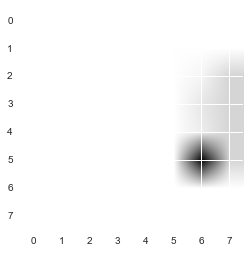

In [232]:
import PIL.ImageOps
plt.imshow(PIL.ImageOps.grayscale(img))

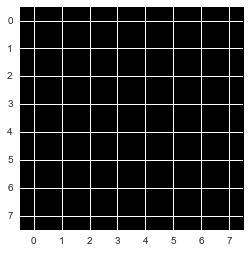

In [228]:
img = PIL.Image.fromarray(digits.images[0], mode="1")
plt.imshow(img)

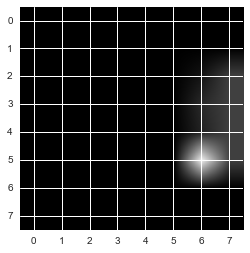

In [229]:
img = PIL.Image.fromarray(digits.images[0], mode="P")
plt.imshow(img)